<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Curve fitting</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"></p>
</div>

In [1]:
!pip install lmfit
import numpy as np
import matplotlib.pyplot as plt
import lmfit.models as models
from lmfit import Model

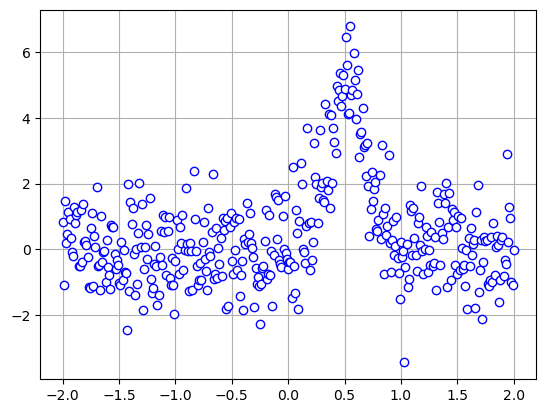

In [2]:
# Gaussian fit

# create some noisy data

gaussModel = models.gaussian

x = np.linspace(-2, 2, 401)
amplitude = 2
centerPeak = .5
shape = .15

data = gaussModel(x, amplitude, centerPeak, shape)
data += np.random.randn(len(x))

plt.plot(x, data, 'bo', markerfacecolor='w')
plt.grid()
plt.show()

In [3]:
gausfit = Model(gaussModel)
result = gausfit.fit(data,x=x)
result

In [4]:
rSquared = np.corrcoef(data, result.best_fit)[0][1]**2 # correlation between data and the model

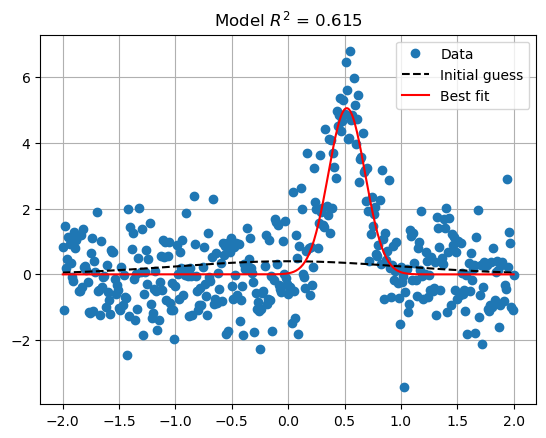

In [5]:
plt.plot(x, data, 'o', label="Data")
plt.plot(x, result.init_fit, 'k--', label='Initial guess')
plt.plot(x, result.best_fit, 'r', label='Best fit')
plt.grid()
plt.legend()
plt.title('Model $R^2$ = %.3f'%rSquared)
plt.show()

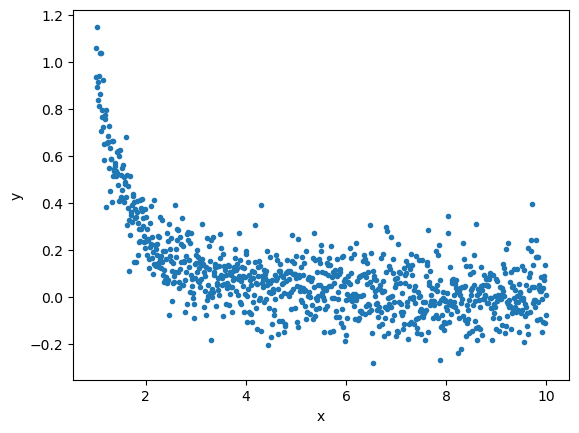

In [11]:
# Exponential decay
x = np.linspace(1, 10, 9_01)
y = (1 / (x**2)) + (np.random.normal(loc=0, scale=np.sqrt(0.01), size=len(x)))

plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
exponentialDecayFit = Model(models.exponential)
result = exponentialDecayFit.fit(y,x=x)
result

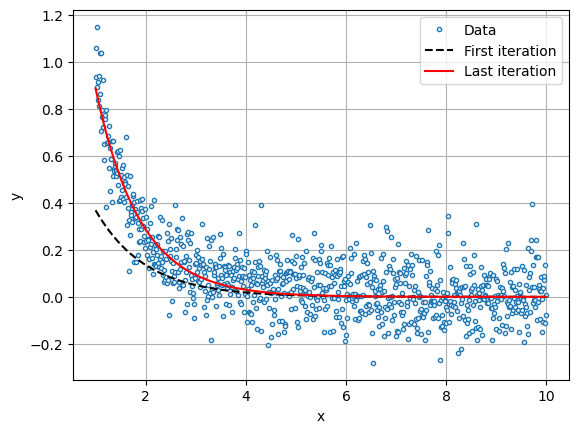

In [16]:
plt.plot(x, y, '.', label='Data', markerfacecolor='w')
plt.plot(x, result.init_fit, 'k--', label='First iteration')
plt.plot(x, result.best_fit, 'r', label='Last iteration')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

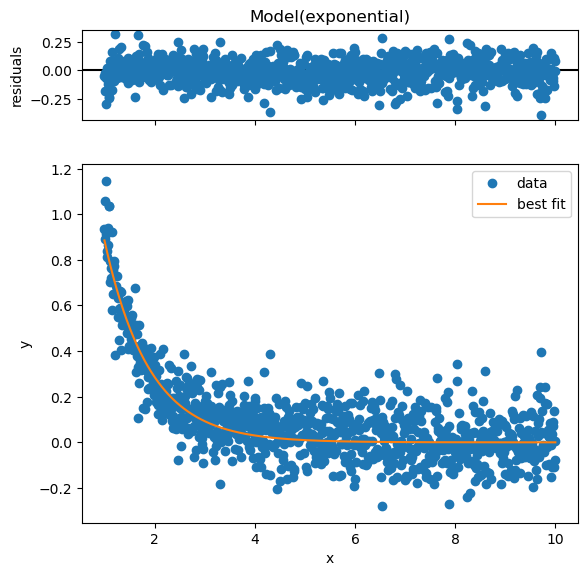

In [18]:
result.plot();